In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create relevant dataframes for analysis:

#dataframe showing country codes
df_country = pd.read_csv('files/Olympics_Country.csv')

#dataframe showing all the Summer Games info
df_games = pd.read_csv('files/Olympics_Games.csv')
df_games_summer =df_games.loc[df_games['edition'].str.contains('Summer')]

# data base of medal tally for all olympic games, from 1896 to 2020
df_tally = pd.read_csv('files/Olympic_Games_Medal_Tally.csv')

In [3]:
df_country

,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra
...,...,...
230,YEM,Yemen
231,YUG,Yugoslavia
232,ZAM,Zambia
233,ZIM,Zimbabwe


In [4]:
#identify host countries for all the Summer Games
df_games_summer =df_games_summer.drop(["edition_id","edition_url",'country_flag_url','start_date','end_date', 'competition_date'],axis=1)
df_games_summer = df_games_summer.rename(columns = {'country_noc':'noc','city': 'host city'})

#add a column of hose country names by merging with df_country dataset
df_games_summer = pd.merge(df_games_summer, df_country, on="noc", how="left")

#rename and reorder the dataset to be more easily understandable
df_games_summer = df_games_summer.rename(columns = {'country':'host country'})
columns = ['edition', 'year','host city', 'host country','noc', 'isHeld']
df_games_summer = df_games_summer[columns]

df_games_summer


,edition,year,host city,host country,noc,isHeld
0,1896 Summer Olympics,1896,Athina,Greece,GRE,NaN
1,1900 Summer Olympics,1900,Paris,France,FRA,NaN
2,1904 Summer Olympics,1904,St. Louis,United States,USA,NaN
3,1908 Summer Olympics,1908,London,Great Britain,GBR,NaN
4,1912 Summer Olympics,1912,Stockholm,Sweden,SWE,NaN
5,1916 Summer Olympics,1916,Berlin,Germany,GER,Not held due to war
6,1920 Summer Olympics,1920,Antwerpen,Belgium,BEL,NaN
7,1924 Summer Olympics,1924,Paris,France,FRA,NaN
8,1928 Summer Olympics,1928,Amsterdam,Netherlands,NED,NaN
9,1932 Summer Olympics,1932,Los Angeles,United States,USA,NaN


In [5]:
#Identify countries that hosted the most number of Summer Games
df_host_country_summer=df_games_summer[['edition','host country']]
df_host_country_summer['host country'].value_counts()

host country
United States                 5
Great Britain                 4
Australia                     3
France                        3
Greece                        2
Germany                       2
Finland                       2
Japan                         2
Canada                        1
People's Republic of China    1
Spain                         1
Republic of Korea             1
Soviet Union                  1
Italy                         1
West Germany                  1
Mexico                        1
Netherlands                   1
Belgium                       1
Sweden                        1
Brazil                        1
Name: count, dtype: int64

In [6]:
df_host_country_summer.describe()


,edition,host country
count,35,35
unique,35,20
top,1896 Summer Olympics,United States
freq,1,5


In [7]:
print(f"There have been 35 Summmer Olympic Games held frm 1896 to 2024")
print(f"The 35 Summer Games have been hosted by 20 different countries")

There have been 35 Summmer Olympic Games held frm 1896 to 2024
The 35 Summer Games have been hosted by 20 different countries


In [8]:
# Focus on metal tally for all Summer Olympic Games only, from 1896 to 2020
summer_tally =  df_tally[df_tally['edition'].str.contains('Summer')]
summer_tally

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1


In [9]:
#calculate total medals by year
total_medals_by_year = summer_tally.groupby('year')[['gold','silver','bronze','total']].sum().reset_index()
total_medals_by_year = total_medals_by_year.rename(columns={'total':'total full game'})
total_medals_by_year
#merge total medal counts to summer_tally dataframe
summer_tally = pd.merge(summer_tally, total_medals_by_year, on='year',how='left')
summer_tally


,edition,edition_id,year,country,country_noc,gold_x,silver_x,bronze_x,total,gold_y,silver_y,bronze_y,total full game
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20,43,43,36,122
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47,43,43,36,122
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13,43,43,36,122
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11,43,43,36,122
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7,43,43,36,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1,340,338,402,1080
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1,340,338,402,1080
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1,340,338,402,1080
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1,340,338,402,1080


In [10]:
#rename columns names
summer_tally = summer_tally.rename(columns = {"country_noc":"noc",
                                             "gold_x":"country_gold",
                                             "silver_x":"country_silver",
                                             "bronze_x":"country_bronze",
                                             "total":"country_total",
                                             "gold_y":"game_gold",
                                             "silver_y":"game_silver",
                                             "bronze_y":"game_bronze",
                                             "total full game":"game_total"})
summer_tally

,edition,edition_id,year,country,noc,country_gold,country_silver,country_bronze,country_total,game_gold,game_silver,game_bronze,game_total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20,43,43,36,122
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47,43,43,36,122
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13,43,43,36,122
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11,43,43,36,122
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7,43,43,36,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1,340,338,402,1080
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1,340,338,402,1080
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1,340,338,402,1080
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1,340,338,402,1080


In [11]:
#add a column calculating the percentage of total medal count by country to the total medal count of the entire game
summer_tally["country_medal_percentage"] = summer_tally['country_total']/summer_tally['game_total']* 100
summer_tally

,edition,edition_id,year,country,noc,country_gold,country_silver,country_bronze,country_total,game_gold,game_silver,game_bronze,game_total,country_medal_percentage
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20,43,43,36,122,16.393443
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47,43,43,36,122,38.524590
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13,43,43,36,122,10.655738
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11,43,43,36,122,9.016393
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7,43,43,36,122,5.737705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1,340,338,402,1080,0.092593
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1,340,338,402,1080,0.092593
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1,340,338,402,1080,0.092593
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1,340,338,402,1080,0.092593


In [12]:
#create a metal tally for USA only for Summer Olympics Gamees
USA_summer_tally = summer_tally[summer_tally['noc']=="USA"]
USA_summer_tally

,edition,edition_id,year,country,noc,country_gold,country_silver,country_bronze,country_total,game_gold,game_silver,game_bronze,game_total,country_medal_percentage
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20,43,43,36,122,16.393443
12,1900 Summer Olympics,2,1900,United States,USA,20,13,15,48,96,94,94,284,16.901408
30,1904 Summer Olympics,3,1904,United States,USA,80,85,83,248,97,92,91,280,88.571429
39,1908 Summer Olympics,5,1908,United States,USA,23,12,12,47,110,107,107,324,14.506173
57,1912 Summer Olympics,6,1912,United States,USA,26,19,19,64,106,107,104,317,20.189274
76,1920 Summer Olympics,7,1920,United States,USA,41,27,27,95,158,152,139,449,21.158129
98,1924 Summer Olympics,8,1924,United States,USA,45,27,27,99,129,132,131,392,25.255102
129,1928 Summer Olympics,9,1928,United States,USA,22,18,16,56,119,118,119,356,15.730337
163,1932 Summer Olympics,10,1932,United States,USA,44,36,30,110,125,125,120,370,29.729730
192,1936 Summer Olympics,11,1936,United States,USA,24,21,12,57,141,140,141,422,13.507109


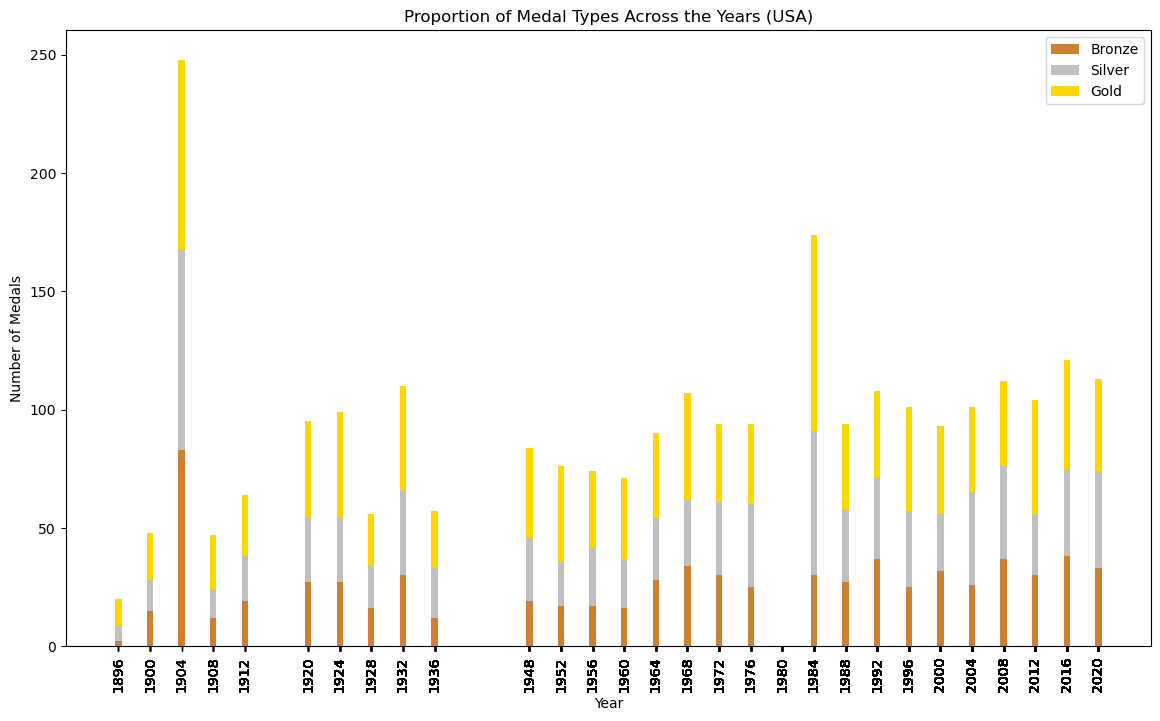

In [13]:
#What are the USA metal counts by type over the years
plt.figure(figsize=(14, 8))
plt.bar(USA_summer_tally['year'], USA_summer_tally['country_bronze'], label='Bronze', color='#cd7f32')
plt.bar(USA_summer_tally['year'], USA_summer_tally['country_silver'], bottom=USA_summer_tally['country_bronze'], label='Silver', color='silver')
plt.bar(USA_summer_tally['year'], USA_summer_tally['country_gold'], bottom=USA_summer_tally['country_bronze'] + USA_summer_tally['country_silver'], label='Gold', color='gold')

plt.title('Proportion of Medal Types Across the Years (USA)')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(summer_tally['year'], rotation=90)
plt.legend(loc='upper right')
plt.show()

In [14]:
# number of metals USA has won in each of the summer games
USA_summer_medal_trend = summer_tally[summer_tally['country'] == 'United States'].set_index('year')['country_total']
USA_summer_medal_trend

year
1896     20
1900     48
1904    248
1908     47
1912     64
1920     95
1924     99
1928     56
1932    110
1936     57
1948     84
1952     76
1956     74
1960     71
1964     90
1968    107
1972     94
1976     94
1984    174
1988     94
1992    108
1996    101
2000     93
2004    101
2008    112
2012    104
2016    121
2020    113
Name: country_total, dtype: int64

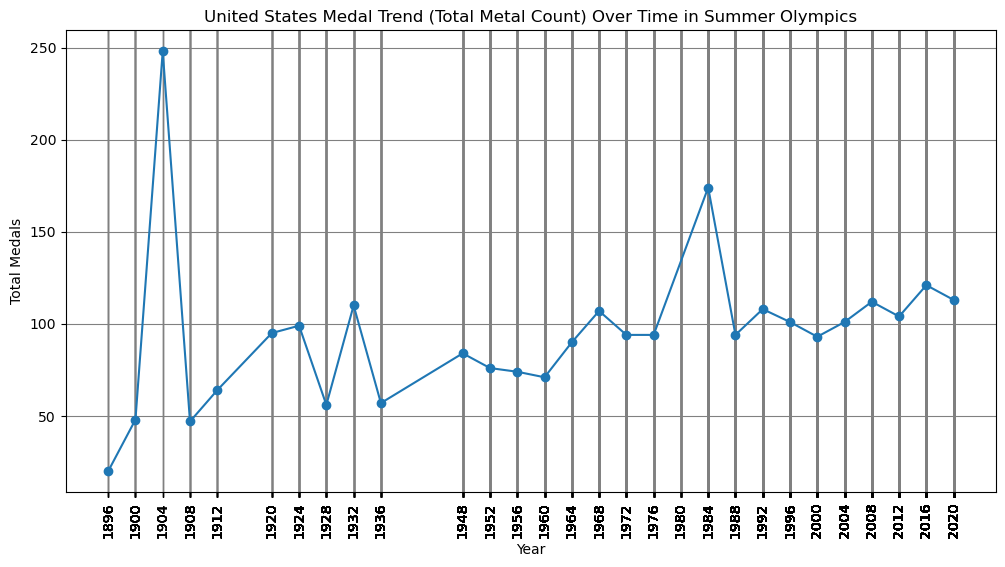

In [26]:
# Trend of US metal in summer Olympics over time
USA_summer_medal_trend.plot(kind='line', marker='o', figsize=(12, 6), title='United States Medal Trend (Total Metal Count) Over Time in Summer Olympics', ylabel='Total Medals', xlabel='Year')
plt.grid(color='gray')
plt.xticks(summer_tally['year'], rotation=90)
plt.show()

In [ ]:
# Trend of US metal in summer Olympics over time
USA_summer_medal_trend.plot(kind='line', marker='o', figsize=(12, 6), title='United States Medal Trend Over Time in Summer Olympics', ylabel='Total Medals', xlabel='Year')


In [50]:
# percentage of of metals USA has won in comparison total metals awarded in each of the summer games
USA_summer_medal_percentage = summer_tally[summer_tally['country'] == 'United States'].set_index('year')['country_medal_percentage']
USA_summer_medal_percentage

year
1896    16.393443
1900    16.901408
1904    88.571429
1908    14.506173
1912    20.189274
1920    21.158129
1924    25.255102
1928    15.730337
1932    29.729730
1936    13.507109
1948    18.961625
1952    16.557734
1956    16.407982
1960    15.401302
1964    17.857143
1968    20.303605
1972    15.666667
1976    15.334421
1984    25.290698
1988    12.719892
1992    13.251534
1996    11.995249
2000    10.032362
2004    10.907127
2008    11.691023
2012    10.833333
2016    12.448560
2020    10.462963
Name: country_medal_percentage, dtype: float64

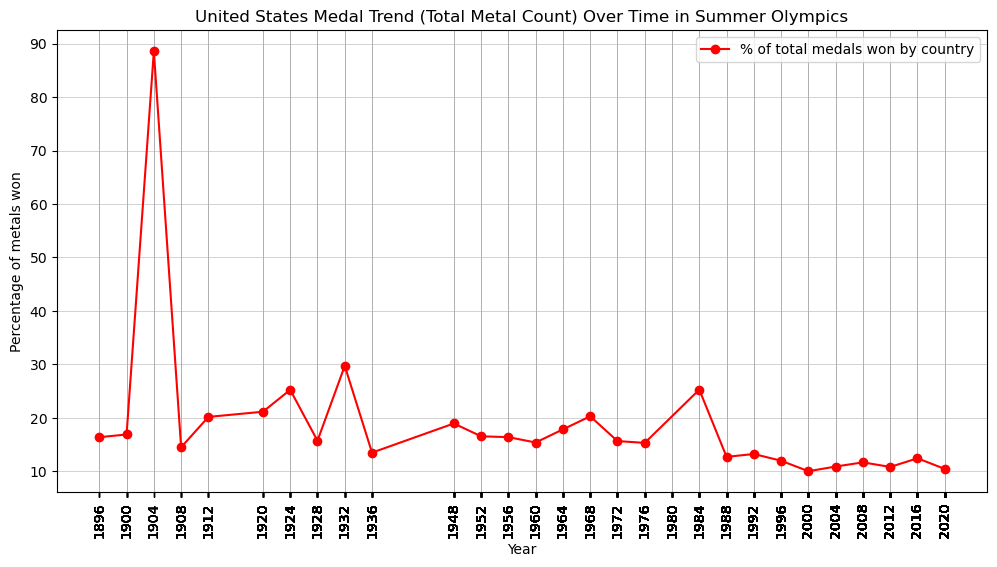

In [52]:
# Trend of US medal percentage in summer Olympics over time
USA_summer_medal_percentage.plot(kind='line', marker='o', figsize=(12, 6), title='United States Medal Trend (Total Metal Count) Over Time in Summer Olympics', ylabel='Percentage of metals won', xlabel='Year', color='r', label='% of total medals won by country')
plt.grid(linewidth=0.4)
plt.xticks(summer_tally['year'], rotation=90)
plt.legend()
plt.show()

In [ ]:
#how many Summer games did each of these countries held?
host_country_summer = df_games_summer['noc'].value_counts()
host_country_summer

In [ ]:
#create a new dataset focusing on the top 8 countries that hosted the summer games the most 
top_summer_hosts = ['USA','GBR','AUS','FRA','GRE',"GER",'FIN','JPN']
top_summer_hosts_tally =summer_tally[summer_tally['noc'].isin(top_summer_hosts)]
top_summer_hosts_tally.head(50)

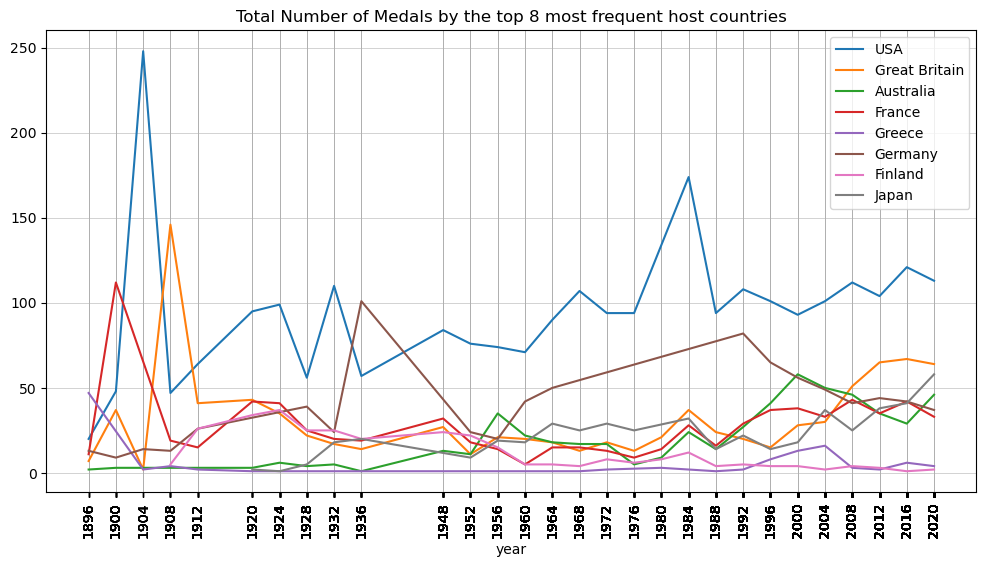

In [44]:
#plot trends of total numbers of medals won by the top countries
summer_tally[summer_tally['country'] == 'United States'].set_index('year')['country_total'].plot(figsize=(12,6),label="USA")
summer_tally[summer_tally['country'] == 'Great Britain'].set_index('year')['country_total'].plot(label="Great Britain")
summer_tally[summer_tally['country'] == 'Australia'].set_index('year')['country_total'].plot(label="Australia")
summer_tally[summer_tally['country'] == 'France'].set_index('year')['country_total'].plot(label="France")
summer_tally[summer_tally['country'] == 'Greece'].set_index('year')['country_total'].plot(label="Greece")
summer_tally[summer_tally['country'] == 'Germany'].set_index('year')['country_total'].plot(label="Germany")
summer_tally[summer_tally['country'] == 'Finland'].set_index('year')['country_total'].plot(label="Finland")
summer_tally[summer_tally['country'] == 'Japan'].set_index('year')['country_total'].plot(label="Japan")
plt.title('Total Number of Medals by the top 8 most frequent host countries')
plt.legend(loc="best")
plt.grid(linewidth=0.4)
plt.xticks(summer_tally['year'], rotation=90)
plt.show()

In [ ]:
#plot trends of percentage of medals won by the top countries
summer_tally[summer_tally['country'] == 'United States'].set_index('year')['country_medal_percentage'].plot(figsize=(12,6),label="USA")
summer_tally[summer_tally['country'] == 'Great Britain'].set_index('year')['country_medal_percentage'].plot(label="Great Britain")
summer_tally[summer_tally['country'] == 'Australia'].set_index('year')['country_medal_percentage'].plot(label="Australia")
summer_tally[summer_tally['country'] == 'France'].set_index('year')['country_medal_percentage'].plot(label="France")
summer_tally[summer_tally['country'] == 'Greece'].set_index('year')['country_medal_percentage'].plot(label="Greece")
summer_tally[summer_tally['country'] == 'Germany'].set_index('year')['country_medal_percentage'].plot(label="Germany")
summer_tally[summer_tally['country'] == 'Finland'].set_index('year')['country_medal_percentage'].plot(label="Finland")
summer_tally[summer_tally['country'] == 'Japan'].set_index('year')['country_medal_percentage'].plot(label="Japan")
plt.title('Percentage of medtals won by the top host countries of Summer Olympic Games')
plt.xticks(summer_tally['year'], rotation=90)
plt.legend(loc="best")
plt.grid(linewidth=0.4)
plt.show()